In [1]:
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

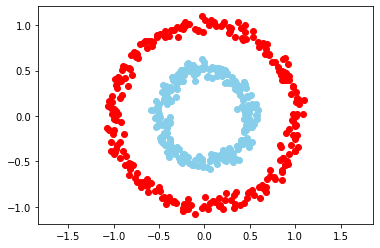

In [35]:
#Visualizacion del modelo

n=500
p=2
X,Y=make_circles(n_samples = n, factor= 0.5, noise=0.05)
Y= Y[:,np.newaxis]
plt.scatter(X[Y[:,0]== 0,0],X[Y[:,0]==0,1],c='red')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='skyblue')
plt.axis('equal')
plt.show()

In [26]:
#Aqui creamos una clase la cual nos permitira crear capas para nuestra red neuronal 

class neural_layer():

    def __init__(self, n_conn, n_neur, act_f  ):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)     * 2 - 1
        self.w = np.random.rand(n_conn, n_neur)* 2 - 1

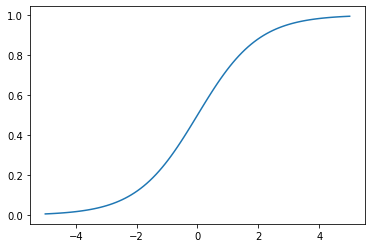

In [15]:
#Funciones de Activacion 

sigm = (lambda x : 1 / (1 + np.e ** (-x)),
        lambda x : x * (1 - x) )

_X=np.linspace(-5,5,100)
plt.plot(_X,sigm[0](_X))

In [27]:


def nn_creator (topology, act_f):
    nn=[]
    for l, layer in enumerate(topology[:-1]):

        nn.append(neural_layer(topology[l],topology[l+1],act_f))
    return nn    



In [38]:
#Forward 

topology = [p, 4, 8, 1]
neural_net = nn_creator(topology,sigm)

l2cost = (lambda Yp , Yr : np.mean((Yp - Yr) **2),
           lambda Yp , Yr : (Yp - Yr))



def train (neural_net, X, Y, l2cost, lr= 0.5, train= True) :


    out=[(None,X)]

    for l,layer in enumerate(neural_net):

        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a= neural_net[l].act_f[0](z)

        out.append((z,a))
    if train:

        deltas = []
        for l in reversed(range(0,len(neural_net))):
            z=out[l+1][0]
            a=out[l+1][1]
            if l == len(neural_net)-1:
                deltas.insert(0,l2cost[1](a,Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0,deltas[0] @ _w.T * neural_net[l].act_f[1](a))

            _w=neural_net[l].w    

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0] , axis=0 , keepdims=True) * lr  
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr         
 
    return out[-1][1]



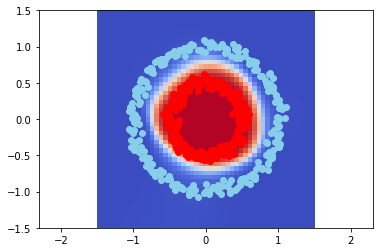

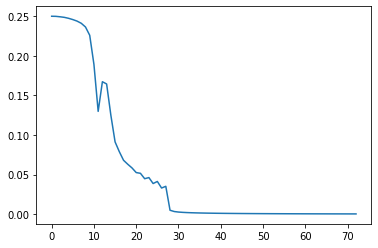

KeyboardInterrupt: ignored

In [41]:
import time 
from IPython.display import clear_output

neural_n= nn_creator(topology,sigm )
loss= []

for i in range(2500):

    pY= train(neural_n, X, Y, l2cost, lr=0.05)

    if i % 25 == 0:

        print(pY)
        loss.append(l2cost[0](pY,Y))

        res=50
        _x0=np.linspace(-1.5,1.5,res)
        _x1=np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))

        for i0, x0 in enumerate(_x0):

            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([x0,x1]), Y ,l2cost, train=False)[0][0]
            
        plt.pcolormesh(_x0,_x1,_Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0]== 0,0],X[Y[:,0]==0,1],c='skyblue')
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='red')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)

